## 기본세팅

In [1]:
### 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/liberation
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/shar

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import scipy.stats as stats

## 환자(주 이용고객)

### 데이터 활용 목적 : 보호자(주 이용고객) 특성 파악 후 최적 서비스 기획용

In [4]:
# 첫 번째 데이터프레임 : 환자 남녀 성비
gender_ratio = {
    '성별': ['남성', '여성'],
    '당월(2024년 3월)(%)': [43.1, 56.9],
    '전체(2020년 9월 ~ 2024년 3월)(%)': [44.7, 55.3]
}
df_gender_ratio = pd.DataFrame(gender_ratio)

# 두 번째 데이터프레임 : 환자 성별 돌봄 기간(일)
care_period = {
    '성별': ['남성', '여성'],
    '당월(2024년 3월)(일)': [8.2, 7],
    '전체(2020년 9월 ~ 2024년 3월)(일)': [9.7, 9.5]
}
df_care_period = pd.DataFrame(care_period)

In [5]:
# 세 번째 데이터프레임 (환자 연령별 분포)
patient_age = {
    '연령': ['0대', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대', '100대'],
    '당월(2024년 3월)(%)': [17.6, 4.2, 4.1, 4.8, 10, 15.4, 21, 16.7, 5.3, 0.7, 0],
    '전체(2020년 9월 ~ 2024년 3월)(%)': [7.2, 1.9, 2, 3.8, 7.9, 12.6, 22.8, 23.2, 16, 2.4, 0.1]
}
df_patient_age = pd.DataFrame(patient_age)

# 네 번째 데이터프레임 (환자 연령별 돌봄 기간)
caring_period = {
    '연령': ['0대', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대', '100대'],
    '당월(2024년 3월)(일)': [3.5, 4, 5.9, 5.6, 5.5, 7.8, 8.2, 9.4, 13.3, 11.4, 0],
    '전체(2020년 9월 ~ 2024년 3월)(일)': [4, 6.4, 8.4, 7.1, 8.2, 9.2, 9.5, 9.8, 11.6, 15.1, 16.6]
}
df_caring_period = pd.DataFrame(caring_period)

# 다섯 번째 데이터프레임 (환자 지역별 분포)
region_percentage = {
    '지역명': ['서울', '부산', '인천', '대구', '광주', '대전', '울산', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주', '세종'],
    '당월(2024년 3월)(%)': [21, 4.6, 3.9, 3.4, 10.5, 4.6, 0.9, 15.7, 4, 3.2, 3, 5.9, 6.6, 2.4, 7.3, 1.9, 1],
    '전체(2020년 9월 ~ 2024년 3월)(%)': [36.6, 4.1, 3.9, 3, 5.2, 4.4, 0.8, 19.8, 3, 2.3, 3.5, 3.4, 3.1, 1.9, 3.8, 0.7, 0.5]
}
df_region_percentage = pd.DataFrame(region_percentage)

# 여섯 번째 데이터프레임 (환자 상태 요약)
patient_status = {
    '기간': ['당월(2024년 3월)(일)', '전체(2020년 9월 ~ 2024년 3월)(일)'],
    '몸무게': [53.9, 57.3],
    '연령': [48.4, 60.8],
    '석션(%)': [3.8, 8],
    '욕창(%)': [3.5, 5.6],
    '기저귀 소변줄(%)': [27.4, 45.4],
    '장루(%)': [0.9, 1.8],
    '피딩(%)': [3.4, 9.3]
}
df_patient_status = pd.DataFrame(patient_status)

In [6]:
# 환자 남녀 성비
df_gender_ratio

,성별,당월(2024년 3월)(%),전체(2020년 9월 ~ 2024년 3월)(%)
0,남성,43.1,44.7
1,여성,56.9,55.3


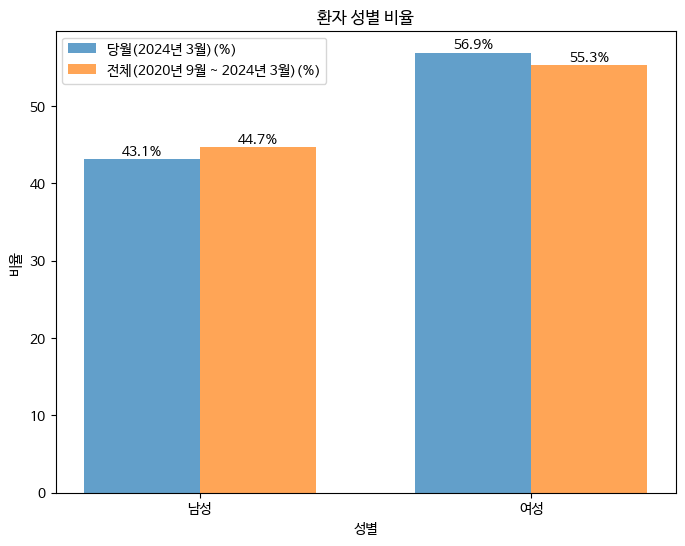

In [7]:
# 환자 남녀 성비

bar_width = 0.35
index = np.arange(len(df_gender_ratio['성별']))

plt.figure(figsize=(8, 6))

bar1 = plt.bar(index, df_gender_ratio['당월(2024년 3월)(%)'], bar_width, alpha=0.7, label='당월(2024년 3월)(%)')
bar2 = plt.bar(index + bar_width, df_gender_ratio['전체(2020년 9월 ~ 2024년 3월)(%)'], bar_width, alpha=0.7, label='전체(2020년 9월 ~ 2024년 3월)(%)')

plt.title('환자 성별 비율')
plt.xlabel('성별')
plt.ylabel('비율')
plt.xticks(index + bar_width / 2, df_gender_ratio['성별'])
plt.legend()

for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, '%.1f%%' % height, ha='center', va='bottom')

plt.show()

In [8]:
# 환자 성별 돌봄 기간(일)
df_care_period

,성별,당월(2024년 3월)(일),전체(2020년 9월 ~ 2024년 3월)(일)
0,남성,8.2,9.7
1,여성,7.0,9.5


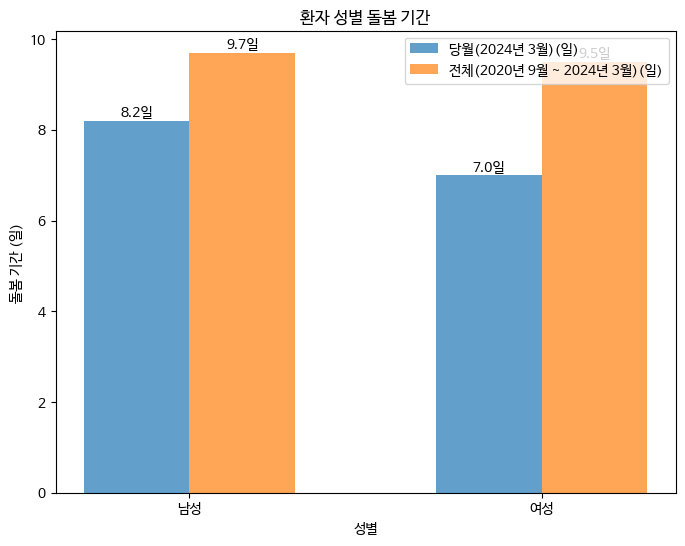

In [9]:
# 환자 성별 돌봄 기간(일)

bar_width = 0.3  # 막대의 폭을 조정
index = np.arange(len(df_care_period['성별']))

plt.figure(figsize=(8, 6))

bar1 = plt.bar(index - bar_width/2, df_care_period['당월(2024년 3월)(일)'], bar_width, alpha=0.7, label='당월(2024년 3월)(일)')
bar2 = plt.bar(index + bar_width/2, df_care_period['전체(2020년 9월 ~ 2024년 3월)(일)'], bar_width, alpha=0.7, label='전체(2020년 9월 ~ 2024년 3월)(일)')

plt.title('환자 성별 돌봄 기간')
plt.xlabel('성별')
plt.ylabel('돌봄 기간 (일)')
plt.xticks(index, df_care_period['성별'])
plt.legend()

for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, '%.1f일' % height, ha='center', va='bottom')

plt.show()

In [10]:
# 환자 연령별 분포
df_patient_age

,연령,당월(2024년 3월)(%),전체(2020년 9월 ~ 2024년 3월)(%)
0,0대,17.6,7.2
1,10대,4.2,1.9
2,20대,4.1,2.0
3,30대,4.8,3.8
4,40대,10.0,7.9
5,50대,15.4,12.6
6,60대,21.0,22.8
7,70대,16.7,23.2
8,80대,5.3,16.0
9,90대,0.7,2.4


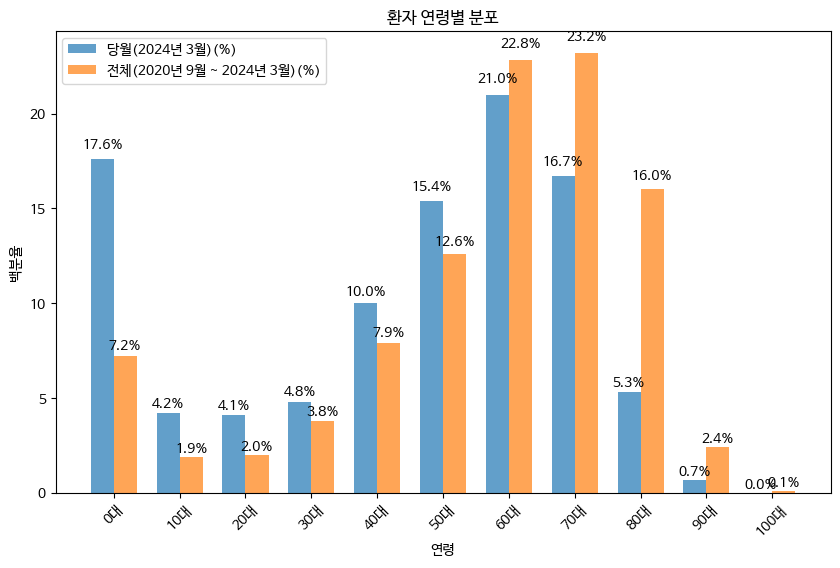

In [11]:
# 환자 연령별 분포

# 막대 그래프 생성
bar_width = 0.35
index = np.arange(len(df_patient_age))

plt.figure(figsize=(10, 6))

bar1 = plt.bar(index - bar_width/2, df_patient_age['당월(2024년 3월)(%)'], bar_width, alpha=0.7, label='당월(2024년 3월)(%)')
bar2 = plt.bar(index + bar_width/2, df_patient_age['전체(2020년 9월 ~ 2024년 3월)(%)'], bar_width, alpha=0.7, label='전체(2020년 9월 ~ 2024년 3월)(%)')

plt.title('환자 연령별 분포')
plt.xlabel('연령')
plt.ylabel('백분율')
plt.xticks(index, df_patient_age['연령'], rotation=45)
plt.legend()

# 수치 추가
for i, rect in enumerate(bar1):
    plt.text(rect.get_x() + rect.get_width() / 2.0, 1.02 * rect.get_height(), '%.1f%%' % df_patient_age.iloc[i, 1], ha='center', va='bottom')

for i, rect in enumerate(bar2):
    plt.text(rect.get_x() + rect.get_width() / 2.0, 1.02 * rect.get_height(), '%.1f%%' % df_patient_age.iloc[i, 2], ha='center', va='bottom')

plt.show()

In [12]:
# 환자 연령별 돌봄 기간
df_caring_period

,연령,당월(2024년 3월)(일),전체(2020년 9월 ~ 2024년 3월)(일)
0,0대,3.5,4.0
1,10대,4.0,6.4
2,20대,5.9,8.4
3,30대,5.6,7.1
4,40대,5.5,8.2
5,50대,7.8,9.2
6,60대,8.2,9.5
7,70대,9.4,9.8
8,80대,13.3,11.6
9,90대,11.4,15.1


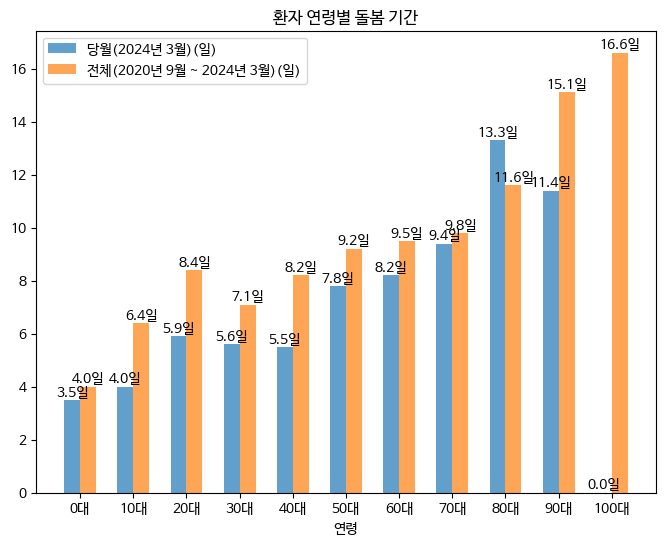

In [13]:
# 환자 연령별 돌봄 기간

bar_width = 0.3  # 막대의 폭을 조정
index = np.arange(len(df_caring_period['연령']))

plt.figure(figsize=(8, 6))

bar1 = plt.bar(index - bar_width/2, df_caring_period['당월(2024년 3월)(일)'], bar_width, alpha=0.7, label='당월(2024년 3월)(일)')
bar2 = plt.bar(index + bar_width/2, df_caring_period['전체(2020년 9월 ~ 2024년 3월)(일)'], bar_width, alpha=0.7, label='전체(2020년 9월 ~ 2024년 3월)(일)')

plt.title('환자 연령별 돌봄 기간')
plt.xlabel('연령')
plt.xticks(index, df_caring_period['연령'])
plt.legend()

for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, '%.1f일' % height, ha='center', va='bottom')

plt.show()

In [14]:
# 환자 지역별 분포
df_region_percentage

,지역명,당월(2024년 3월)(%),전체(2020년 9월 ~ 2024년 3월)(%)
0,서울,21.0,36.6
1,부산,4.6,4.1
2,인천,3.9,3.9
3,대구,3.4,3.0
4,광주,10.5,5.2
5,대전,4.6,4.4
6,울산,0.9,0.8
7,경기,15.7,19.8
8,강원,4.0,3.0
9,충북,3.2,2.3


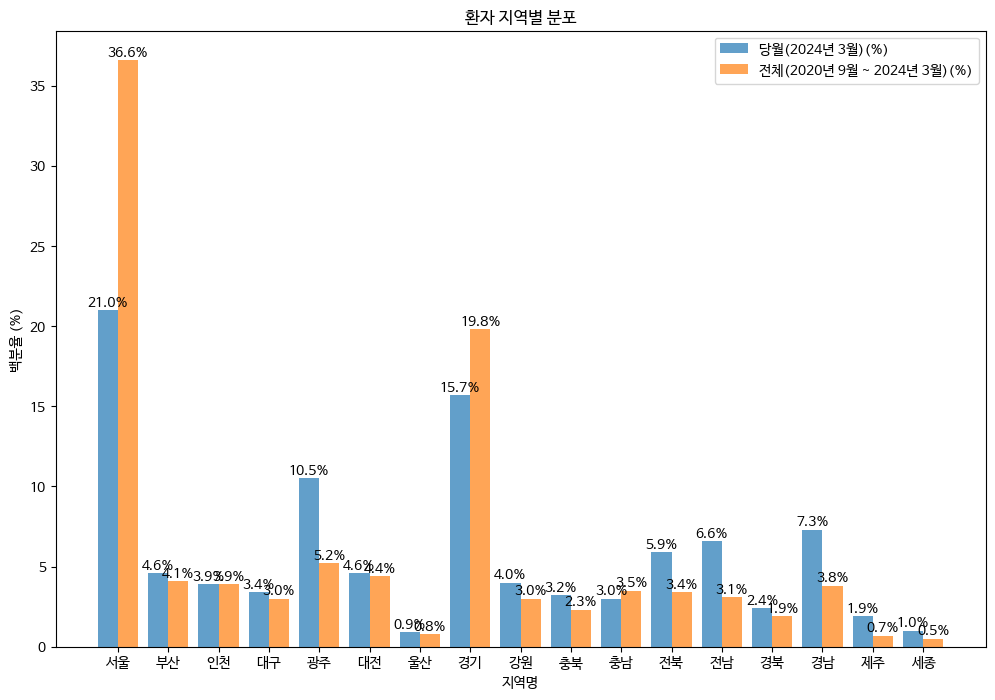

In [22]:
# 환자 지역별 분포

# 막대의 위치
bar_width = 0.4
index = np.arange(len(df_region_percentage['지역명']))

plt.figure(figsize=(12, 8))

bar1 = plt.bar(index, df_region_percentage['당월(2024년 3월)(%)'], bar_width, alpha=0.7, label='당월(2024년 3월)(%)')
bar2 = plt.bar(index + bar_width, df_region_percentage['전체(2020년 9월 ~ 2024년 3월)(%)'], bar_width, alpha=0.7, label='전체(2020년 9월 ~ 2024년 3월)(%)')

plt.title('환자 지역별 분포')
plt.xlabel('지역명')
plt.ylabel('백분율 (%)')
plt.xticks(index + bar_width/2, df_region_percentage['지역명'])

# 범례 추가
plt.legend()

# 막대 위에 수치(%) 표시
for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, '%.1f%%' % height, ha='center', va='bottom')

plt.show()

In [16]:
# 여섯 번째 데이터프레임 (환자 상태 요약)
df_patient_status

# 몸무게 및 연령은 평균치, 그 외 환자 상태는 해당 상태를 갖고 있는 환자의 비율

,기간,몸무게,연령,석션(%),욕창(%),기저귀 소변줄(%),장루(%),피딩(%)
0,당월(2024년 3월)(일),53.9,48.4,3.8,3.5,27.4,0.9,3.4
1,전체(2020년 9월 ~ 2024년 3월)(일),57.3,60.8,8.0,5.6,45.4,1.8,9.3


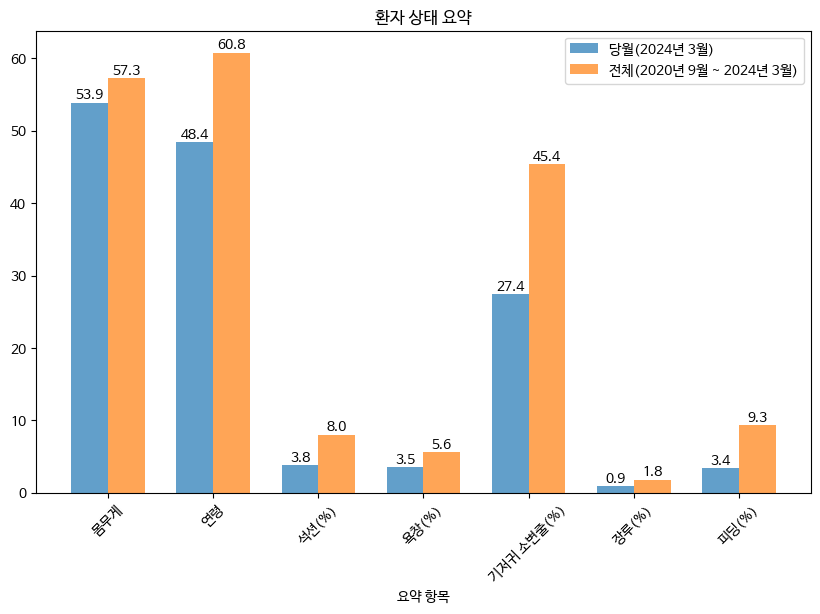

In [17]:
# 환자 지역별 분포

# 막대 그래프 생성
bar_width = 0.35
index = np.arange(len(df_patient_status.columns[1:]))

plt.figure(figsize=(10, 6))

bar1 = plt.bar(index - bar_width/2, df_patient_status.iloc[0, 1:], bar_width, alpha=0.7, label='당월(2024년 3월)')
bar2 = plt.bar(index + bar_width/2, df_patient_status.iloc[1, 1:], bar_width, alpha=0.7, label='전체(2020년 9월 ~ 2024년 3월)')

plt.title('환자 상태 요약')
plt.xlabel('요약 항목')
plt.xticks(index, df_patient_status.columns[1:], rotation=45)
plt.legend()

for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, '%.1f' % height, ha='center', va='bottom')

plt.show()

## 환자 정보 정리
#### 1. 성별 비율 - 여성이 10% 이상 높음
#### 2. 성별 돌봄 기간 - 2024년 3월, 전체기간 모두 남성이 여성보다 김
#### 3. 연령별 분포
   ##### 1) 당월(2024년 3월) : 60대 > 10대 미만 > 70대 > 50대 ...순
   ##### 2) 전체기간 : 70대 > 60대 > 80대 > 50대 ...순
#### 4. 연령별 돌봄 기간
   ##### 1) 당월(2024년 3월) : 80대 > 90대 > 70대 > 60대 ...순
   ##### 2) 전체기간 : 100대 > 90대 > 80대 > 70대 ...순
#### 5. 지역별 분포
   ##### 1) 당월(2024년 3월) : 서울 > 경기 > 광주 > 경남 ...순
   ##### 2) 전체기간 : 서울 > 경기 > 광주 > 대전 ...순
#### 6. 환자 상태
###### (몸무게 및 연령은 평균치, 그 외 환자 상태는 해당 상태를 갖고 있는 환자의 비율)
   ##### 1) 연령은 평균 60.8세, 몸무게는 57.3세
   ##### 2) 기저귀와 소변줄이 필요한 환자 45.4%
   ##### 3) 그 외에도 욕창이 생기거나 피딩이 필요한 것으로 보아 거동이 어렵고, 움직임이 줄어드는 만큼 음식섭취도 줄고 혼자서 식사가 어려운 환자가 다수이다.

## 결론

##### 1) 환자 성별 비율은 여성이 높음에도 돌봄기간은 남성이 높음 → 남성에게 도움이 더 필요
##### 2) 돌봄기간은 고령으로 갈 수록 길어지지만 연령별 분포도가 70대가 가장 높음 → 70대에게 집중
##### 3) 서울에 환자가 가장 많이 거주하고 있음
##### 4) 혼자서도 거동이 어렵고 음식 섭취가 어려운 환자들을 위한 간병 서비스가 필요

##### ▶ 수익적인 면을 고려하여 '서울에 사는 70대 남성'을 타겟으로 간병 서비스 집중